# Step 5: Measure Population Fidelity (PF)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from math import sqrt
import sys

sys.path.append('../src')
from PF_metrics import *
from utils import *

In [2]:
config = getExperimentConfig()
settings = getPicklesFromDir(config['folders']['settings_dir'])
display(settings)

[{'meta': {'name': 'Diabetes',
   'id': 'D0',
   'filename': 'diabetes.csv',
   'target': 'Outcome',
   'ordinal_features': None,
   'numeric_features': ['DiabetesPedigreeFunction',
    'BMI',
    'Insulin',
    'Glucose',
    'Age',
    'SkinThickness',
    'BloodPressure',
    'Pregnancies'],
   'text_features': None,
   'categorical_features': None,
   'meta_data': {'fields': {'Pregnancies': {'type': 'numerical',
      'subtype': 'integer'},
     'Glucose': {'type': 'numerical', 'subtype': 'integer'},
     'BloodPressure': {'type': 'numerical', 'subtype': 'integer'},
     'SkinThickness': {'type': 'numerical', 'subtype': 'integer'},
     'Insulin': {'type': 'numerical', 'subtype': 'integer'},
     'BMI': {'type': 'numerical', 'subtype': 'float'},
     'DiabetesPedigreeFunction': {'type': 'numerical', 'subtype': 'float'},
     'Age': {'type': 'numerical', 'subtype': 'integer'},
     'Outcome': {'type': 'categorical'}}},
   'sd_meta_list': []},
  'setup_param': {'target': 'Outcome',
 

In [3]:
original_data = pd.read_csv("../data/real/diabetes.csv")
sd0q1 = pd.read_csv("../data/synthetic/SD0Q1_0.csv")
sd0q2 = pd.read_csv("../data/synthetic/SD0Q2_0.csv")
display(sd0q1)
display(sd0q2)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,149,81,37,317,35.8,1.226,21,0
1,1,0,141,96,57,146,50.1,1.065,49,0
2,2,0,107,82,54,28,37.2,1.108,43,0
3,3,0,156,110,24,22,23.1,1.948,81,1
4,4,16,177,91,26,23,27.5,0.880,28,1
...,...,...,...,...,...,...,...,...,...,...
763,763,0,86,81,23,27,31.3,1.133,45,0
764,764,0,152,95,22,16,34.8,1.002,55,1
765,765,3,171,64,23,397,36.0,1.085,21,1
766,766,0,91,47,59,161,19.1,1.150,25,0


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,5,166,6,19,202,16.0,0.293,26,1
1,1,5,122,63,20,0,36.4,0.334,35,0
2,2,12,121,89,21,0,42.5,0.503,30,1
3,3,2,101,73,1,150,18.5,0.117,30,0
4,4,1,115,38,49,0,38.1,0.659,31,0
...,...,...,...,...,...,...,...,...,...,...
763,763,3,119,66,6,137,26.7,0.078,21,0
764,764,13,154,101,0,11,33.7,0.109,46,1
765,765,7,149,66,12,98,36.7,0.339,22,1
766,766,3,151,83,5,133,37.2,0.617,43,0


In [4]:
sd0q1.drop(columns='Unnamed: 0', inplace=True)
display(sd0q1.head())
sd0q2.drop(columns='Unnamed: 0', inplace=True)
display(sd0q2.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,149,81,37,317,35.8,1.226,21,0
1,0,141,96,57,146,50.1,1.065,49,0
2,0,107,82,54,28,37.2,1.108,43,0
3,0,156,110,24,22,23.1,1.948,81,1
4,16,177,91,26,23,27.5,0.880,28,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,166,6,19,202,16.0,0.293,26,1
1,5,122,63,20,0,36.4,0.334,35,0
2,12,121,89,21,0,42.5,0.503,30,1
3,2,101,73,1,150,18.5,0.117,30,0
4,1,115,38,49,0,38.1,0.659,31,0


In [5]:
spmse1 = s_pmse(original_data, sd0q1)
spmse2 = s_pmse(original_data, sd0q2)
print(f"S_pMSE: SD0Q1: {spmse1}, SD0Q2: {spmse2}" )

S_pMSE: SD0Q1: 132.5712351450904, SD0Q2: 35.64264826121336


In [6]:
display(sd0q1.head())
r1 = pmse(original_data, sd0q1)
r2 = pmse(original_data, sd0q2)
print(f"pMSE: SD0Q1: {r1}, SD0Q2: {r2}" )

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,149,81,37,317,35.8,1.226,21,0
1,0,141,96,57,146,50.1,1.065,49,0
2,0,107,82,54,28,37.2,1.108,43,0
3,0,156,110,24,22,23.1,1.948,81,1
4,16,177,91,26,23,27.5,0.880,28,1


pMSE: SD0Q1: 0.1443557685794926, SD0Q2: 0.04037960575494653


In [17]:
from sdmetrics.reports.single_table import QualityReport, DiagnosticReport
q1Report = QualityReport()
q2Report = QualityReport()

d1Report = DiagnosticReport()
d2Report = DiagnosticReport()
meta = settings[0]['meta']['meta_data']

display("SD0Q1")
# d1Report.generate(original_data, sd0q1, metadata)
q1Report.generate(original_data, sd0q1, meta)
display(q1Report.get_details(property_name='Column Shapes'))

display("SD0Q2")
# d2Report.generate(original_data, sd0q2, metadata)
q2Report.generate(original_data, sd0q2, meta)
display(q2Report.get_details(property_name='Column Shapes'))


'SD0Q1'

Creating report: 100%|██████████| 4/4 [00:00<00:00, 33.88it/s]



Overall Quality Score: 75.09%

Properties:
Column Shapes: 65.47%
Column Pair Trends: 84.71%


,Column,Metric,Quality Score
0,Pregnancies,KSComplement,0.377604
1,Glucose,KSComplement,0.776042
2,BloodPressure,KSComplement,0.639323
3,SkinThickness,KSComplement,0.640625
4,Insulin,KSComplement,0.516927
5,BMI,KSComplement,0.841146
6,DiabetesPedigreeFunction,KSComplement,0.332031
7,Age,KSComplement,0.886719
8,Outcome,TVComplement,0.881510


'SD0Q2'

Creating report: 100%|██████████| 4/4 [00:00<00:00, 41.44it/s]



Overall Quality Score: 87.98%

Properties:
Column Shapes: 84.97%
Column Pair Trends: 90.99%


,Column,Metric,Quality Score
0,Pregnancies,KSComplement,0.867188
1,Glucose,KSComplement,0.916667
2,BloodPressure,KSComplement,0.723958
3,SkinThickness,KSComplement,0.910156
4,Insulin,KSComplement,0.721354
5,BMI,KSComplement,0.811198
6,DiabetesPedigreeFunction,KSComplement,0.867188
7,Age,KSComplement,0.934896
8,Outcome,TVComplement,0.894531


In [30]:
# display("SD0Q1")
# d1fig = d1Report.get_visualization(property_name='Coverage')
# d1fig.show()
# q1fig = q1Report.get_visualization(property_name='Column Shapes')
# q1fig.show()

In [31]:
# display("SD0Q2")
# d2fig = d2Report.get_visualization(property_name='Coverage')
# d2fig.show()
# q2fig = q2Report.get_visualization(property_name='Column Shapes')
# q2fig.show()

In [11]:
from sdmetrics.reports import utils

fig = utils.get_column_pair_plot(
    real_data=original_data,
    synthetic_data=sd0q1,
    column_names= ['Glucose', 'Age'],
    metadata=metadata
    
)

fig.show()

In [13]:
from sdmetrics.single_table import BNLikelihood, BNLogLikelihood, GMLogLikelihood

meta = settings[0]['meta']['meta_data']

gm1 = GMLogLikelihood.compute(real_data=original_data, synthetic_data=sd0q1, metadata=meta)
gm2 = GMLogLikelihood.compute(real_data=original_data, synthetic_data=sd0q2, metadata=meta)
bn1 = BNLikelihood.compute(real_data=original_data, synthetic_data=sd0q1, metadata=meta)
bn2 = BNLikelihood.compute(real_data=original_data, synthetic_data=sd0q2, metadata=meta)
bnlog1 = BNLogLikelihood.compute(real_data=original_data, synthetic_data=sd0q1, metadata=meta)
bnlog2 = BNLogLikelihood.compute(real_data=original_data, synthetic_data=sd0q2, metadata=meta)

display(f"gm1: {gm1}, gm2: {gm2}")
display(f"bn1: {bn1}, bn2: {bn2}")
display(f"bnlog1: {bnlog1}, bnlog2: {bnlog2}")


'gm1: -36.699367095884, gm2: -31.533521227012944'

'bn1: 0.5098334418402778, bn2: 0.513766818576389'

'bnlog1: -0.7206920270824719, bnlog2: -0.7125719604430015'

Method to find optimal number of clusters for the clustering model using the silhouette analysis method.

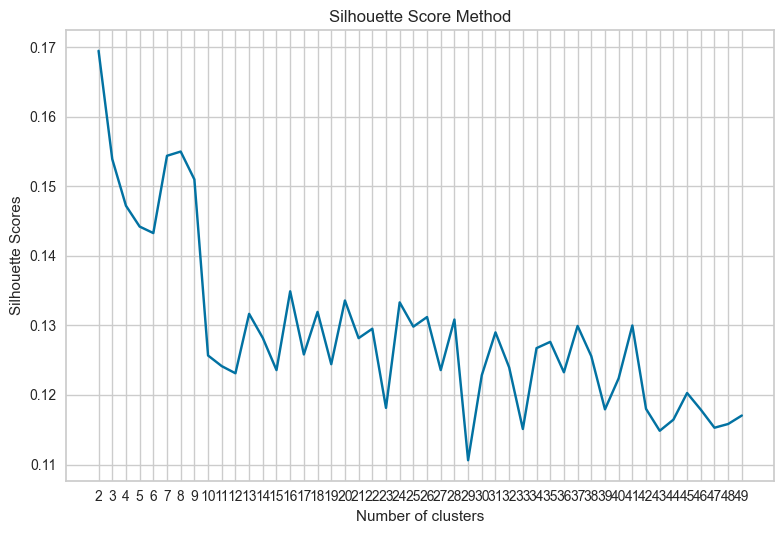

In [37]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

n_clusters = 20

o_data = original_data.copy()
#o_data['S'] = 0

s_data = sd0q1.copy()
#s_data['S'] = 1


combined_data = pd.concat([o_data, s_data], axis=0)
scaled_combined_data = standardize_select_columns(combined_data, [8])

silhouette_scores = []

k_range = range(2, 50)

for k in k_range:

    kproto = KPrototypes(n_clusters=k, init='Cao').fit(scaled_combined_data, categorical=[8])
    silhouette_scores.append(silhouette_score(scaled_combined_data, kproto.labels_))

fig, ax = plt.subplots()
ax.plot(k_range, silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(k_range)
plt.tight_layout()
plt.show()

In [39]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# check implementation of cluster analysis
o_data = original_data.copy()
o_data['S'] = 0

s_data = sd0q1.copy()
s_data['S'] = 1


combined_data = pd.concat([o_data, s_data], axis=0)
scaled_combined_data = standardize_select_columns(combined_data, [8])

k=4
kproto = KPrototypes(n_clusters=k, init='Cao').fit(scaled_combined_data, categorical=[8])

cluster_labels = kproto.labels_

original_data_count = o_data.shape[0]    # number of samples in original data
synthetic_data_count = s_data.shape[0]  # number of samples in synthetic data
total_data_count = original_data_count + synthetic_data_count

constant_c = original_data_count / (original_data_count + synthetic_data_count)

display(cluster_labels)


scaler = StandardScaler()
column_indices = np.arange(combined_data.shape[1])

columns_to_standardize = np.setdiff1d(column_indices, [8,9])

combined_data.iloc[:, columns_to_standardize] = scaler.fit_transform(combined_data.iloc[:, columns_to_standardize])

#for cluster_id in range(k):
#
#    # TODO: add column, and identify dataset sample from the cluster
#    original_cluster_data_count = np.sum(cluster_labels[:original_data_count] == cluster_id)
#    synthetic_cluster_data_count = np.sum(cluster_labels[original_data_count:] == cluster_id)
#
#    total_cluster_data_count = original_cluster_data_count + synthetic_cluster_data_count

array([3, 1, 3, ..., 2, 0, 2], dtype=uint16)

In [38]:
from math import log
n_clusters = 8
categorical_indecies = [8]
c1 = cluster_analysis_metric(original_data=original_data, 
                             synthetic_data=sd0q1, 
                             num_clusters=n_clusters, 
                             categorical_columns=categorical_indecies)
c2 = cluster_analysis_metric(original_data=original_data, 
                             synthetic_data=sd0q2, 
                             num_clusters=n_clusters, 
                             categorical_columns=categorical_indecies)

print(f"Cluster analysis metric: SD0Q1: {c1}, SD0Q2: {c2}" )
print(f"Log cluster analysis metric: SD0Q1: {log(c1)}, SD0Q2: {log(c2)}" )

Cluster analysis metric: SD0Q1: 0.0009436542882639495, SD0Q2: 0.0002699166295130236
Log cluster analysis metric: SD0Q1: -6.965750678953092, SD0Q2: -8.217397426229525
